# Car Price Prediction using **Random Forest and XGBoost**

![Cover](https://www.inovex.de/wp-content/uploads/2019/02/Price-Prediction-in-Online-Car-Marketplaces.png)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# read dataset into 'df'
df = pd.read_csv('car_price_prediction.csv')

# print top 5 records of 'df'
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Data cleaning and pre-processing

![Cleaning](https://miro.medium.com/v2/resize:fit:1400/0*PWiJPO7psV_U4wDF.png)

In [5]:
# print the shape of 'df'
df.shape

(19237, 18)

In [6]:
# display information about 'df' columns, and check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
# check for duplicates records
df[df.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [8]:
# drop duplicated records
df.drop_duplicates(inplace=True)
df.shape

(18924, 18)

#### 'Levy' column and the problem of ('-') values in it

In [9]:
# inspect 'Levy' column
print(f"There is {df[df['Levy'] == '-'].shape[0]} records that have the value (-) in Levy column\nThat's a {round(df[df['Levy'] == '-'].shape[0] / df.shape[0] * 100)}% of the dataset")

There is 5709 records that have the value (-) in Levy column
That's a 30% of the dataset


In [10]:
# calculate mean, median, values of 'Levy' column
levy_vals = []
for rec in df['Levy']:
    if rec == '-':
        continue
    else:
        levy_vals.append(int(rec))

# mean
levy_mean = sum(levy_vals) / len(levy_vals)

# median
levy_vals.sort()
mid = len(levy_vals) // 2
levy_median = (levy_vals[mid] + levy_vals[~mid]) / 2

print(f"(Levy) Column Mean: {round(levy_mean)}")
print(f"(Levy) Column Median: {round(levy_median)}")

(Levy) Column Mean: 906
(Levy) Column Median: 781


In [11]:
# replace (-) values in 'Levy' column, with mean and median
import random

# replace values with zero first, and convert 'Levy' column Dtype
df['Levy'].replace({'-' : 0}, inplace=True)
df['Levy'] = df['Levy'].astype('int64')

mean_count = 0
median_count = 0
L = [levy_mean, levy_median]

for idx, rec in df.iterrows():
    if rec['Levy'] == 0:
        val = random.choice(L)
        df.at[idx, 'Levy'] = val
        
        if val == levy_mean:
            mean_count += 1
        else:
            median_count += 1

print(f"We Have replaced (-) with mean {mean_count} times, and with median {median_count} times.\nNow (Levy) column is of type {df['Levy'].dtype}")

We Have replaced (-) with mean 2842 times, and with median 2867 times.
Now (Levy) column is of type float64


#### 'Engine volume' column with turbo information

In [12]:
# records that have (Turbo) word in 'Engine volume' column
df[df['Engine volume'].str.contains('Turbo')]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
23,45814106,7840,906.299205,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
25,45782859,20385,906.299205,MERCEDES-BENZ,E 220,2006,Sedan,Yes,Diesel,2.2 Turbo,210000 km,4.0,Tiptronic,Rear,04-May,Left wheel,Black,8
30,44944581,15681,1288.000000,MERCEDES-BENZ,Vito,2007,Goods wagon,No,Diesel,2.0 Turbo,180000 km,6.0,Manual,Rear,04-May,Left wheel,White,4
34,45542380,24462,906.299205,JEEP,Grand Cherokee,2007,Jeep,Yes,Diesel,3.0 Turbo,250000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,10
42,45667253,20165,650.000000,VOLKSWAGEN,Jetta,2016,Sedan,Yes,Petrol,1.4 Turbo,11200 km,4.0,Tiptronic,Front,04-May,Left wheel,Black,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19167,45799423,18817,1995.000000,FORD,Transit,2003,Microbus,No,Diesel,2.4 Turbo,2147483647 km,4.0,Manual,Front,02-Mar,Left wheel,White,2
19170,45776725,10976,781.000000,MERCEDES-BENZ,C 220,2001,Sedan,No,Diesel,2.2 Turbo,320000 km,5.0,Automatic,Rear,04-May,Left wheel,Silver,4
19190,45790255,24462,642.000000,BMW,528,2012,Sedan,Yes,Petrol,2.0 Turbo,96966 km,4.0,Tiptronic,Rear,04-May,Left wheel,Black,12
19225,45794580,8781,1107.000000,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7 Turbo,236000 km,4.0,Manual,Front,04-May,Left wheel,Beige,4


In [13]:
# create new derived column 'Turbo' from values that have ('Turbo') in 'Engine volume'
df['Turbo'] = np.where(df['Engine volume'].str.contains('Turbo'), 'Yes', 'No')

# extract numeric part from 'Engine volume' and convert it to float type
df['Engine volume'] = df['Engine volume'].str.extract('(\d+)').astype('float64')

#### 'Mileage' (km) string values

In [14]:
# extract numeric part from 'Mileage' and convert it to float type
df['Mileage'] = df['Mileage'].str.extract('(\d+)').astype('int64')

In [15]:
# Rename 'Mileage' to 'Mileage(Km)'
df = df.rename(columns={'Mileage': 'Mileage(Km)'})

#### What is exactly 'Doors' column?

In [16]:
df[df['Doors'] == '>5']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage(Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
171,45782173,1300,781.000000,AUDI,50,2018,Coupe,Yes,Petrol,0.0,4000,1.0,Tiptronic,Rear,>5,Right-hand drive,Blue,0,No
276,44810053,20385,738.000000,CHEVROLET,Cruze,2017,Sedan,No,Petrol,1.0,42000,4.0,Tiptronic,Front,>5,Left wheel,Black,12,Yes
678,45800055,7213,781.000000,BMW,525,1998,Sedan,No,Petrol,2.0,100000,6.0,Manual,Rear,>5,Left wheel,Silver,6,No
829,45766759,30000,906.299205,NISSAN,X-Trail,2018,Pickup,Yes,Petrol,2.0,18794,12.0,Automatic,4x4,>5,Left wheel,Black,12,No
870,45788787,19757,810.000000,HYUNDAI,Elantra,2016,Sedan,No,Petrol,1.0,113600,4.0,Tiptronic,Front,>5,Left wheel,Grey,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,45788558,10976,781.000000,TOYOTA,ISIS,2007,Minivan,Yes,Petrol,2.0,1000,4.0,Automatic,Front,>5,Right-hand drive,White,12,No
18806,44839699,11917,781.000000,FORD,Escape,2007,Jeep,Yes,Hybrid,2.0,197000,4.0,Automatic,4x4,>5,Left wheel,Black,8,No
19085,45794339,97219,1079.000000,LEXUS,NX 300,2018,Jeep,Yes,Petrol,2.0,25600,4.0,Tiptronic,Front,>5,Left wheel,White,7,Yes
19094,45804509,11290,906.299205,FORD,Transit,2000,Goods wagon,No,Diesel,2.0,270000,4.0,Manual,Rear,>5,Left wheel,Orange,1,Yes


In [17]:
# what values in 'Doors' column?
np.unique(df['Doors'])

array(['02-Mar', '04-May', '>5'], dtype=object)

In [18]:
# calculate mean for each value to determine if there is any usfull info
# ** i want to discover if (02-Mar) means 2 Doors car and (04-May) 4 Doors and so on **
print(f"(02-Mar) Mean: {round(df[df['Doors'] == '02-Mar']['Price'].mean())}")
print(f"(04-May) Mean: {round(df[df['Doors'] == '04-May']['Price'].mean())}")
print(f"(>5) Mean: {round(df[df['Doors'] == '>5']['Price'].mean())}")

(02-Mar) Mean: 50794
(04-May) Mean: 17193
(>5) Mean: 21906


In [19]:
# if this returns any record that means 'Doors' column make no sense and i'll drop it
df[(df['Doors'] == '04-May') & (df['Category'] == 'Coupe')]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage(Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
99,45797276,15458,966.000000,HYUNDAI,Genesis,2009,Coupe,Yes,Petrol,2.0,123346,4.0,Automatic,Front,04-May,Left wheel,Black,4,No
164,45802035,15624,707.000000,HYUNDAI,Genesis,2011,Coupe,Yes,Petrol,2.0,107005,4.0,Automatic,Front,04-May,Left wheel,Grey,4,No
284,45802041,15241,707.000000,HYUNDAI,Genesis,2011,Coupe,Yes,Petrol,2.0,117492,4.0,Automatic,Front,04-May,Left wheel,Grey,4,No
438,45801991,19369,707.000000,HYUNDAI,Genesis,2011,Coupe,Yes,Petrol,2.0,153651,4.0,Automatic,Front,04-May,Left wheel,Red,4,No
515,45797099,16621,1511.000000,HYUNDAI,Genesis,2010,Coupe,Yes,Petrol,3.0,151977,4.0,Automatic,Front,04-May,Left wheel,Blue,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18601,45809682,42880,749.000000,HONDA,Civic,2014,Coupe,Yes,Petrol,2.0,83984,4.0,Automatic,Front,04-May,Left wheel,Red,4,No
18686,45809926,45204,891.000000,HONDA,Civic,2016,Coupe,Yes,Petrol,2.0,53938,4.0,Automatic,Front,04-May,Left wheel,Blue,4,No
18959,45788932,12231,781.000000,MITSUBISHI,Montero Sport,2002,Coupe,No,Petrol,3.0,176000,6.0,Automatic,4x4,04-May,Left wheel,Green,4,No
19019,45797111,14294,966.000000,HYUNDAI,Genesis,2009,Coupe,Yes,Petrol,2.0,152783,4.0,Automatic,Front,04-May,Left wheel,Grey,4,No


#### 'Wheel' diffrent kind of values 

In [20]:
# what values in 'Wheel' column?
np.unique(df['Wheel'])

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [21]:
# standardize the values in 'Wheel'
df['Wheel'].replace({'Left wheel' : 'Left', 'Right-hand drive' : 'Right'}, inplace=True)

#### Drop useless columns (ID, Doors)

In [22]:
df.drop(['ID', 'Doors'], axis = 1, inplace=True)

#### Dataset after cleaning

In [23]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage(Km),Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.0,186005,6.0,Automatic,4x4,Left,Silver,12,No
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left,Black,8,No
2,8467,781.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.0,200000,4.0,Variator,Front,Right,Black,2,No
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.0,168966,4.0,Automatic,4x4,Left,White,0,No
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.0,91901,4.0,Automatic,Front,Left,Silver,4,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage(Km)       18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
 16  Turbo             18924 non-null  object 
dty

## Exploratory Data Analysis (EDA)

![EDA](https://miro.medium.com/v2/resize:fit:3840/1*6-4Odk6CkuhOkAfH-uwJqw.jpeg)

In [25]:
# extract information of distinct values from each column
for col in df.columns:
    distinct_values = np.unique(df[col])
    if len(distinct_values) <= 10:
        print(f'Column: {col}\n Distinct Values: {distinct_values}\n***\n')
    else:
        print(f'Column: {col}\n Distinct Values(Count): {len(distinct_values)}\n***\n')

Column: Price
 Distinct Values(Count): 2315
***

Column: Levy
 Distinct Values(Count): 559
***

Column: Manufacturer
 Distinct Values(Count): 65
***

Column: Model
 Distinct Values(Count): 1590
***

Column: Prod. year
 Distinct Values(Count): 54
***

Column: Category
 Distinct Values(Count): 11
***

Column: Leather interior
 Distinct Values: ['No' 'Yes']
***

Column: Fuel type
 Distinct Values: ['CNG' 'Diesel' 'Hybrid' 'Hydrogen' 'LPG' 'Petrol' 'Plug-in Hybrid']
***

Column: Engine volume
 Distinct Values: [ 0.  1.  2.  3.  4.  5.  6.  7. 20.]
***

Column: Mileage(Km)
 Distinct Values(Count): 7687
***

Column: Cylinders
 Distinct Values(Count): 13
***

Column: Gear box type
 Distinct Values: ['Automatic' 'Manual' 'Tiptronic' 'Variator']
***

Column: Drive wheels
 Distinct Values: ['4x4' 'Front' 'Rear']
***

Column: Wheel
 Distinct Values: ['Left' 'Right']
***

Column: Color
 Distinct Values(Count): 16
***

Column: Airbags
 Distinct Values(Count): 17
***

Column: Turbo
 Distinct Values:

In [26]:
# extract numeric columns and categorical columns from 'df'
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = df.select_dtypes(include=numeric_types).columns
categ_cols = df.select_dtypes(exclude=numeric_types).columns

print(f'Numeric Columns: {numeric_cols}\n')
print(f'Categorical Columns: {categ_cols}')

Numeric Columns: Index(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage(Km)',
       'Cylinders', 'Airbags'],
      dtype='object')

Categorical Columns: Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo'],
      dtype='object')


## Investigate Numerical Columns

In [27]:
# check for summary statistics
df.describe()

,Price,Levy,Prod. year,Engine volume,Mileage(Km),Cylinders,Airbags
count,1.892400e+04,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000
mean,1.858744e+04,887.316283,2010.914236,1.934316,1.555373e+06,4.580216,6.568379
std,1.921356e+05,389.749897,5.665749,0.918359,4.880221e+07,1.200223,4.322323
min,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,5.331000e+03,730.000000,2009.000000,1.000000,7.019575e+04,4.000000,4.000000
50%,1.317200e+04,781.000000,2012.000000,2.000000,1.264000e+05,4.000000,6.000000
75%,2.206300e+04,917.000000,2015.000000,2.000000,1.891198e+05,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


In [28]:
from scipy import stats

def detect_outliers(df, column):
    '''
    function that takes dataframe and column to return a list of outliers in that column
    using Z-Score from stats module.
    
    parameters: 
    1 - df: pandas dataframe
    2 - column: name of the column (string)
    
    returns:
     ** pandas series contains outlier values and index 
    '''
    col = df[column]
    
    z_scores = np.abs(stats.zscore(col))
    outliers = np.where(z_scores > 3)
    
    outlier_indices = outliers[0]
    
    return col.iloc[outlier_indices]

In [29]:
# check for outliers in 'Price', 'Levy' and 'Mileage(Km)' columns
print(detect_outliers(df, 'Price'))
print('\n**\n')
print(detect_outliers(df, 'Levy'))
print('\n**\n')
print(detect_outliers(df, 'Mileage(Km)'))

1225       627220
8541       872946
16983    26307500
Name: Price, dtype: int64

**

18        2386.0
26        2455.0
78        2455.0
115      11714.0
132       2866.0
          ...   
18963     2308.0
18984    11714.0
19045     2225.0
19048     4860.0
19155     2266.0
Name: Levy, Length: 247, dtype: float64

**

985       777777777
2278     2147483647
5456      999999999
6157     2147483647
7724     1234567899
9524     1111111111
10667     999999999
11901    2147483647
12591     999999999
12734    2147483647
12904     999999999
15347    2147483647
15364     222222222
15393    2147483647
16586     999999999
17582    1777777778
19167    2147483647
19199    1111111111
Name: Mileage(Km), dtype: int64


In [30]:
# remove outliers in 'Price'
outs = detect_outliers(df, 'Price')
for index in outs.index:
    df.drop(index, inplace=True)
print('Outliers Removed in Price!')

Outliers Removed in Price!


In [31]:
# remove outliers in 'Levy'
outs = detect_outliers(df, 'Levy')
for index in outs.index:
    df.drop(index, inplace=True)
print('Outliers Removed in Levy!')

Outliers Removed in Levy!


In [32]:
# remove outliers in 'Mileage(Km)'
outs = detect_outliers(df, 'Mileage(Km)')
for index in outs.index:
    df.drop(index, inplace=True)
print('Outliers Removed in Mileage(Km)!')

Outliers Removed in Mileage(Km)!


### Plot distribution for numeric columns

In [33]:
def create_kde(df, col, color = 'skyblue'):
    '''
    Function that takes column from a dataframe and display it's Kernel Density Estimate
    
    parameters: 
    1 - df: pandas dataframe
    2 - col: name of the column (string)
    3 - color(optional): color of the plot, skyblue if not specified
    
    returns:
     ** seaborn kdeplot of the column with size(15x4)
    '''
    sns.set_theme()
    
    plt.figure(figsize=(15, 4))
    ax = sns.kdeplot(df[col], color=color, fill=True, linewidth=2)
    
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title(f'KDE For ({col}) Column', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

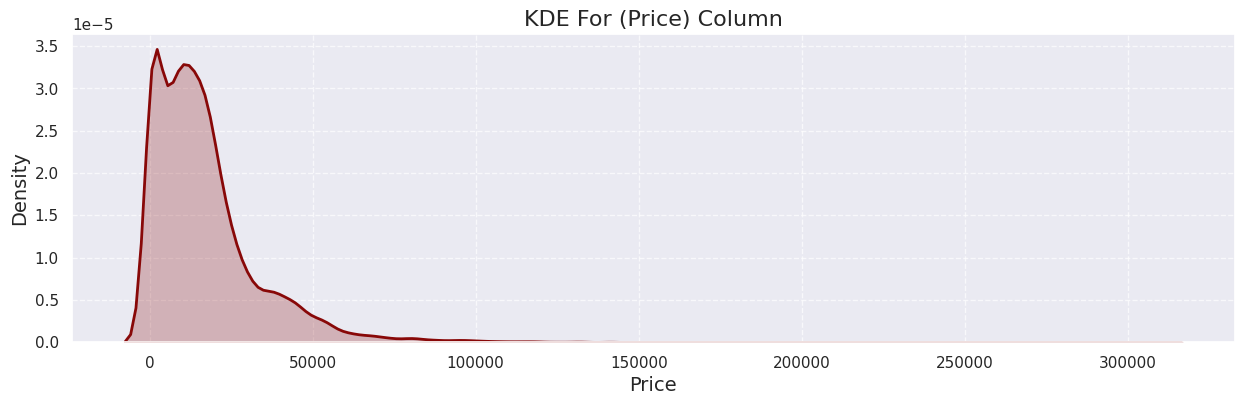

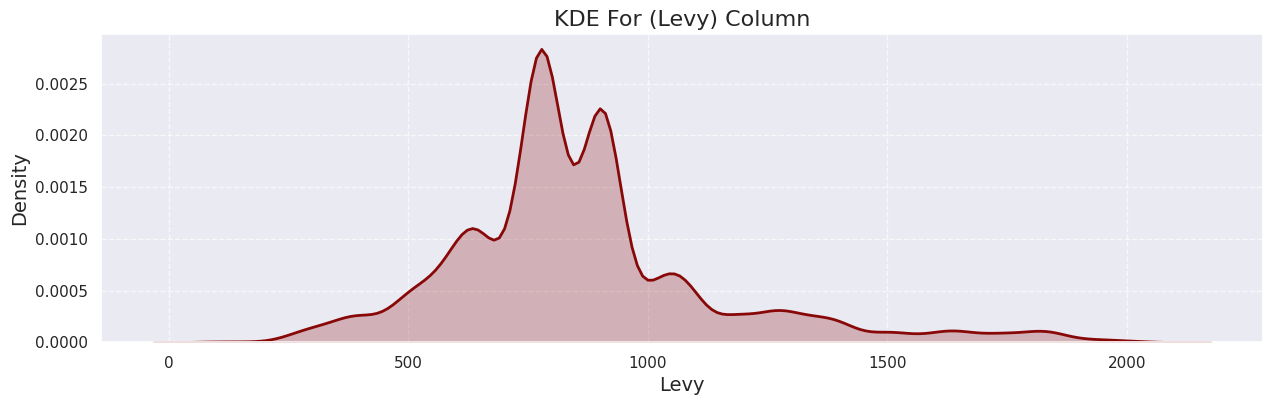

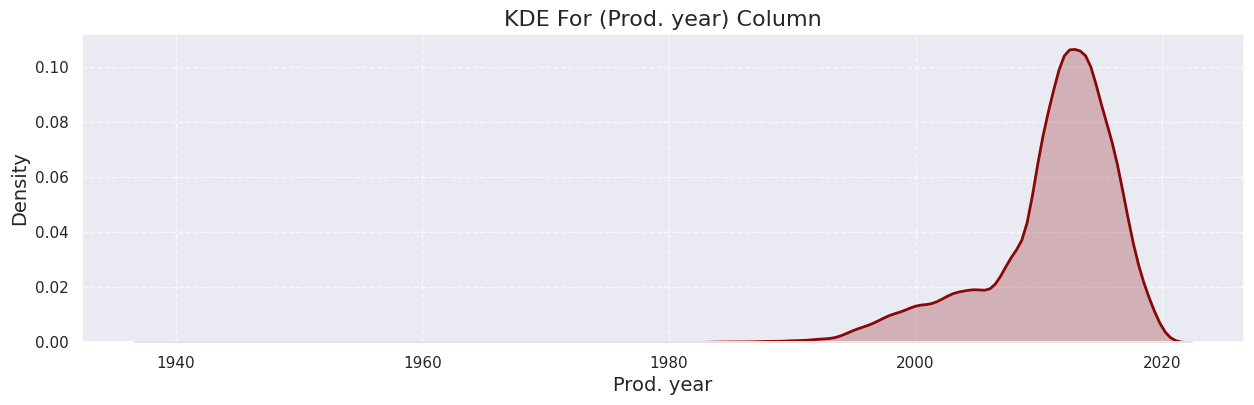

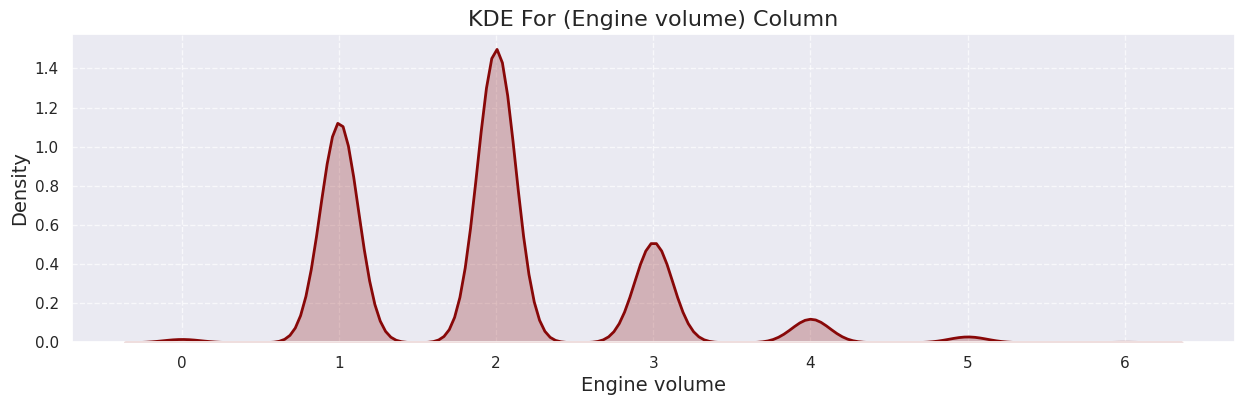

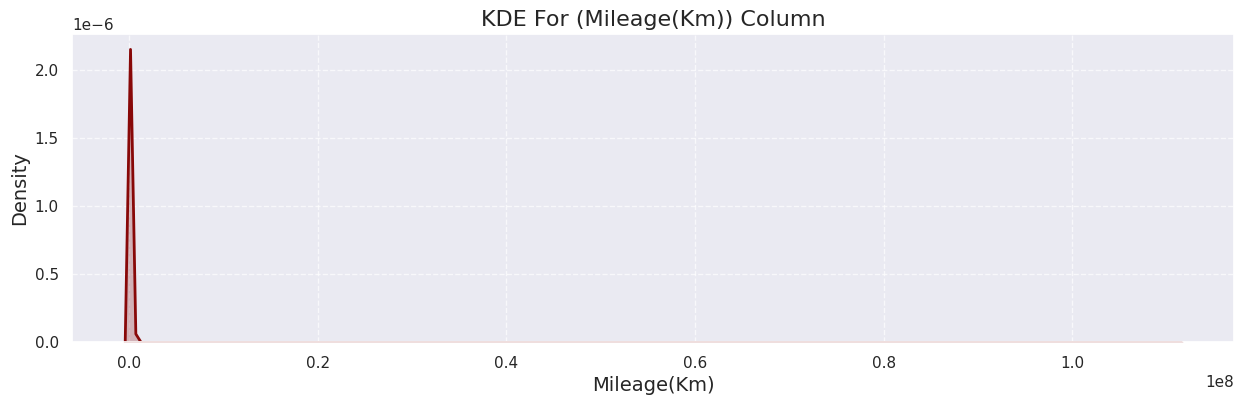

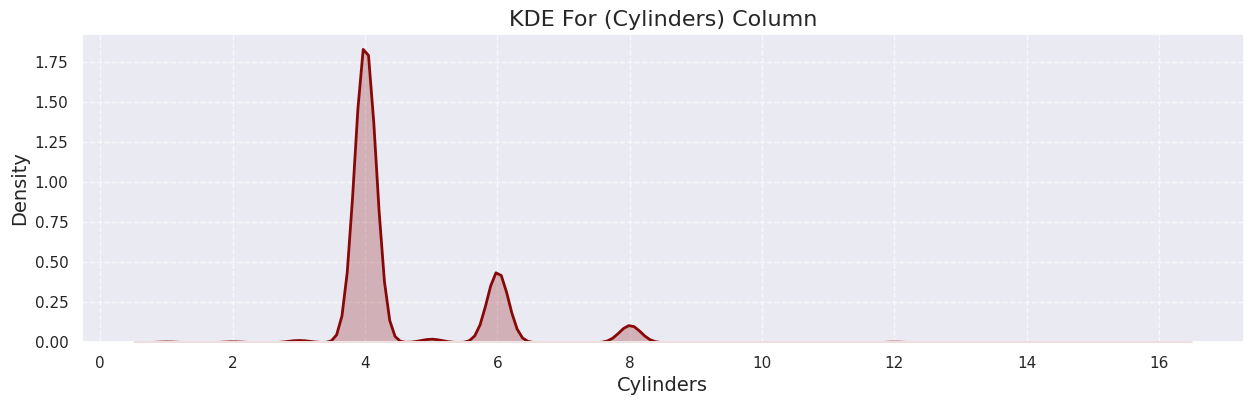

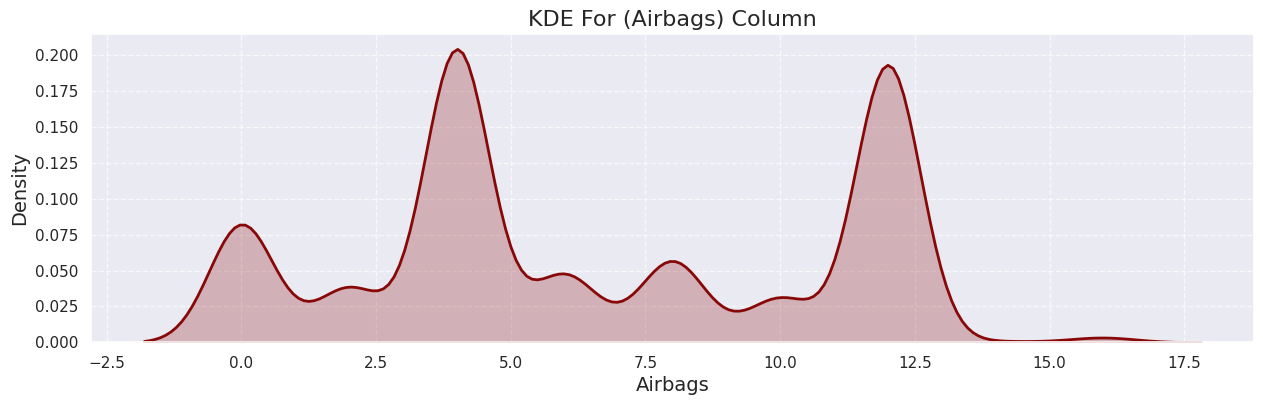

In [34]:
# plot KDE for each numeric column
for col in numeric_cols:
    create_kde(df, col, '#880808')

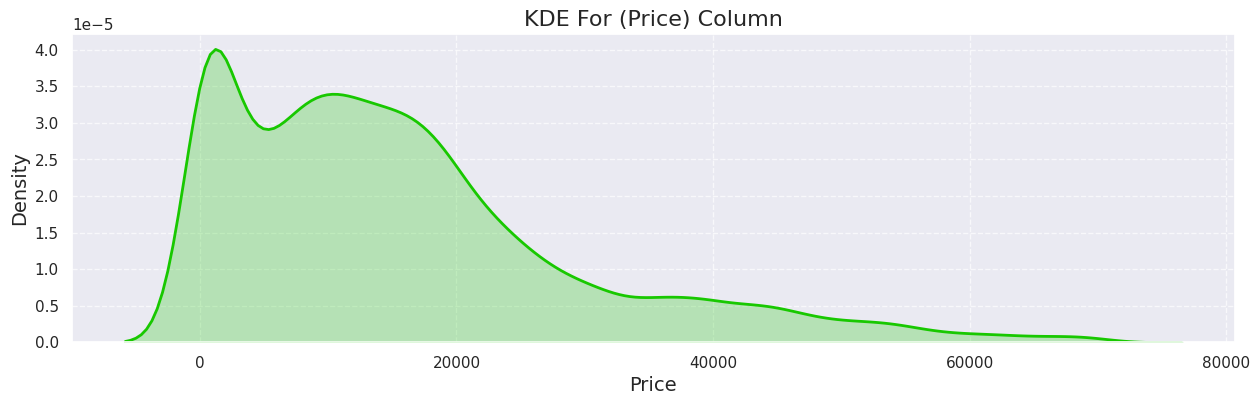

In [35]:
# 'Price' column still have some outliers
outs = detect_outliers(df, 'Price')
for index in outs.index:
    df.drop(index, inplace=True)
    
create_kde(df, 'Price', '#18C800')

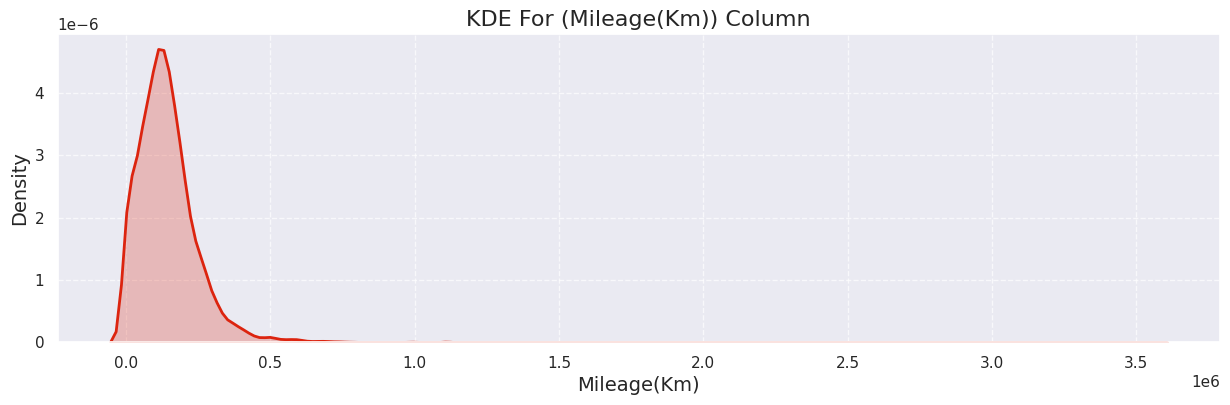

In [36]:
# 'Mileage(Km)' column still have some outliers
outs = detect_outliers(df, 'Mileage(Km)')
for index in outs.index:
    df.drop(index, inplace=True)

create_kde(df, 'Mileage(Km)', '#DC240F')

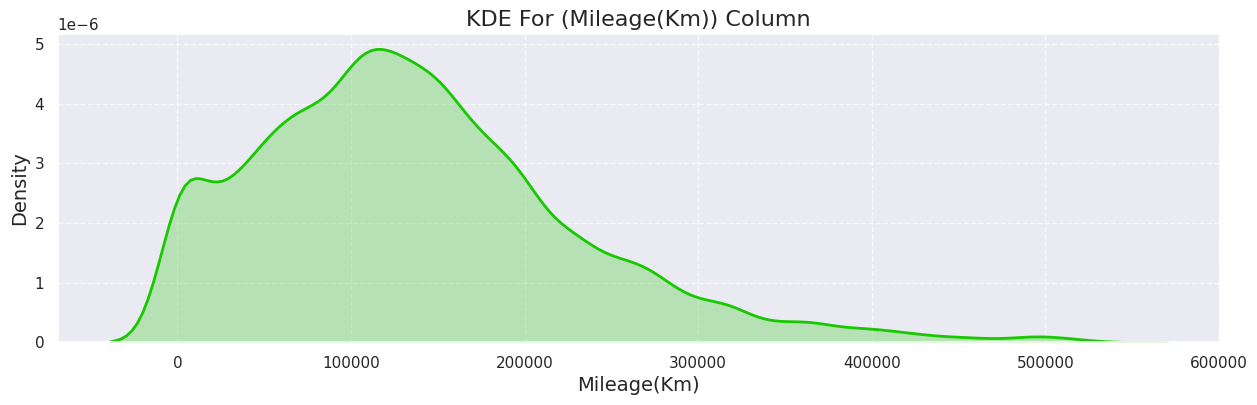

In [37]:
# 'Mileage(Km)' column still have some outliers
outs = detect_outliers(df, 'Mileage(Km)')
for index in outs.index:
    df.drop(index, inplace=True)

create_kde(df, 'Mileage(Km)', '#18C800')

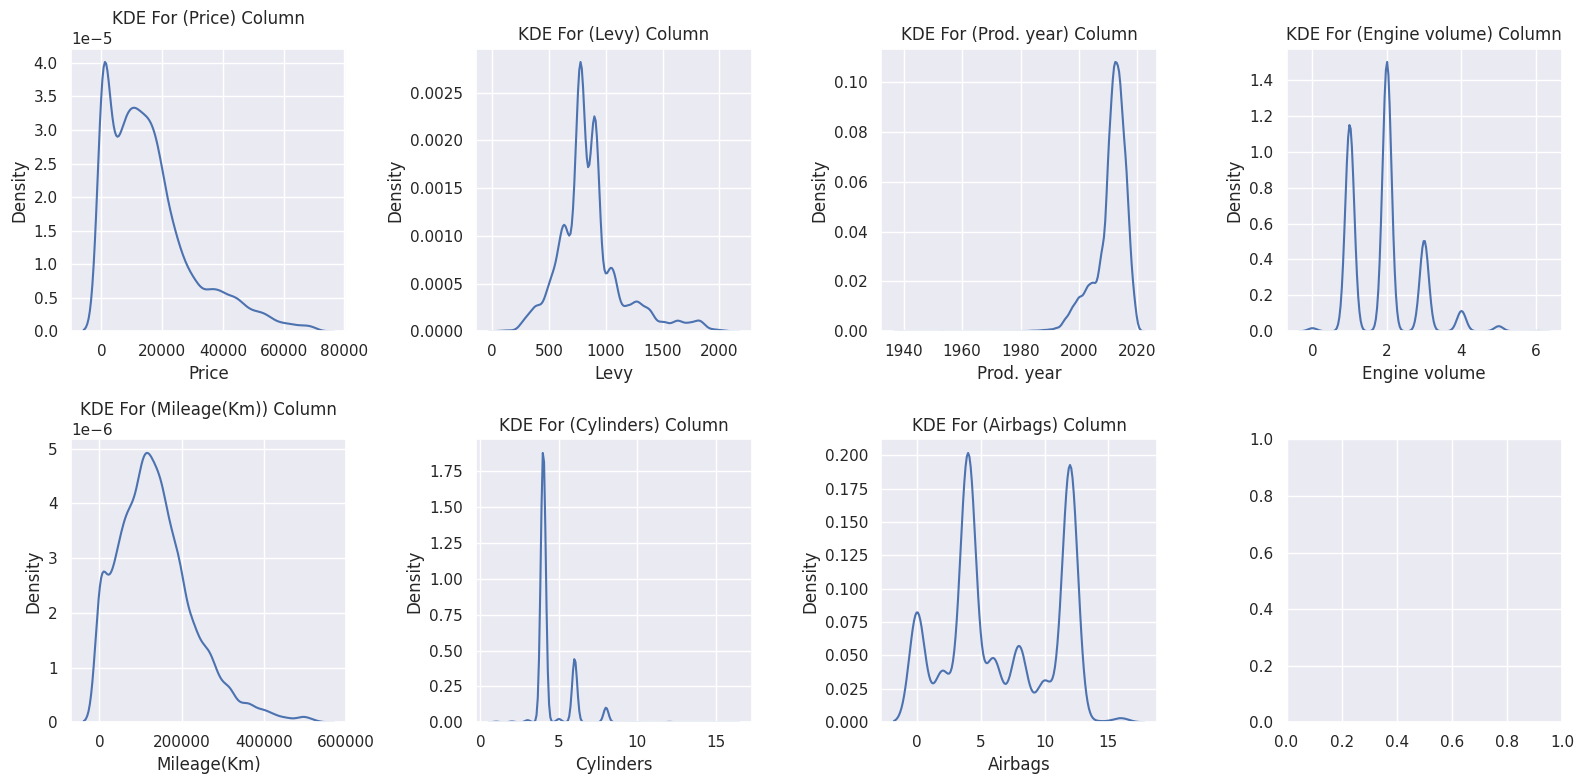

In [38]:
# one plot to display Final Distribution for all numerical columns
sns.set_theme()

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col_name in enumerate(numeric_cols):
    ax = axes[i]
    
    sns.kdeplot(df[col_name], ax=ax)
    ax.set_title(f'KDE For ({col_name}) Column')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

## Investigate Categorical Columns

In [39]:
categ_cols

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo'],
      dtype='object')

#### 'Manufacturer' and values of (სხვა)

In [40]:
# what are the distinct values of 'Manufacturer'
distinct_Manufacturer = np.unique(df['Manufacturer'])
distinct_Manufacturer

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DAEWOO',
       'DAIHATSU', 'DODGE', 'FIAT', 'FORD', 'GAZ', 'GMC', 'GREATWALL',
       'HAVAL', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'ISUZU',
       'JAGUAR', 'JEEP', 'KIA', 'LANCIA', 'LAND ROVER', 'LEXUS',
       'LINCOLN', 'MASERATI', 'MAZDA', 'MERCEDES-BENZ', 'MERCURY', 'MINI',
       'MITSUBISHI', 'MOSKVICH', 'NISSAN', 'OPEL', 'PEUGEOT', 'PONTIAC',
       'PORSCHE', 'RENAULT', 'ROLLS-ROYCE', 'ROVER', 'SAAB', 'SATURN',
       'SCION', 'SEAT', 'SKODA', 'SSANGYONG', 'SUBARU', 'SUZUKI', 'TESLA',
       'TOYOTA', 'UAZ', 'VAZ', 'VOLKSWAGEN', 'VOLVO', 'ZAZ', 'სხვა'],
      dtype=object)

In [41]:
# what is (სხვა) values in 'Manufacturer'?
df[df['Manufacturer'] == 'სხვა']

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage(Km),Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
2358,25089,906.299205,სხვა,IVECO DAYLY,2007,Microbus,No,Diesel,2.0,328000,4.0,Manual,Rear,Left,White,1,Yes
4792,9408,781.000000,სხვა,GONOW,2005,Jeep,Yes,Petrol,2.0,102000,4.0,Manual,Rear,Left,Silver,2,No


In [42]:
# drop all records that have this value
df.drop([2358, 4792], inplace=True)

### Plot countplot for Categorical columns

In [43]:
def create_countplot(df, col, palette='crest'):
    '''
    Function that takes column from a dataframe and display it's countplot
    
    parameters: 
    1 - df: pandas dataframe
    2 - col: name of the column (string)
    3 - palette (optional): palette colors of the plot, crest if not specified
    
    returns:
     ** seaborn countplot of the column with size(15x4)
    '''
    sns.set_theme()
    
    plt.figure(figsize=(15, 4))
    ax = sns.countplot(data=df, x=col, palette=palette, order=df[col].value_counts().index)
    
    # count annotations on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black')
    
    plt.xlabel(col, fontsize=14)
    ax.set_yticks([])
    ax.set_ylabel('')
    plt.title(f'Countplot For ({col}) Column', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

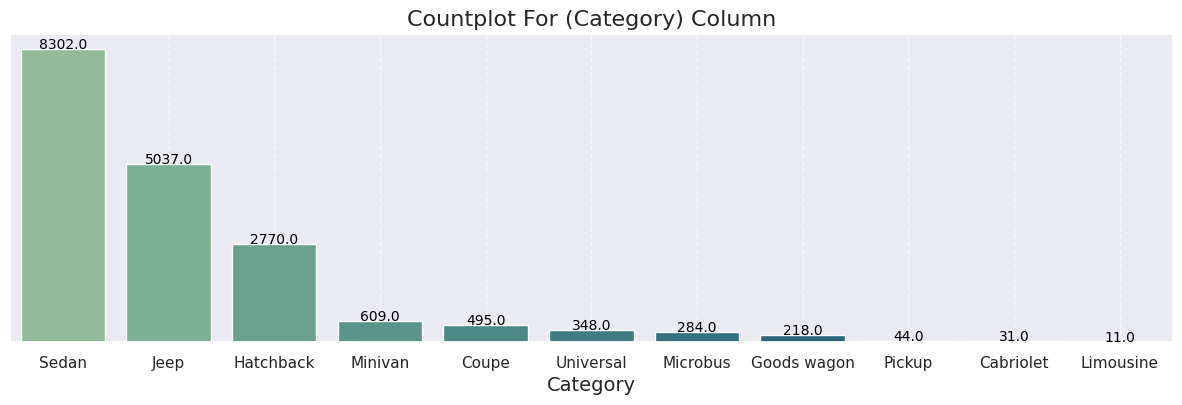

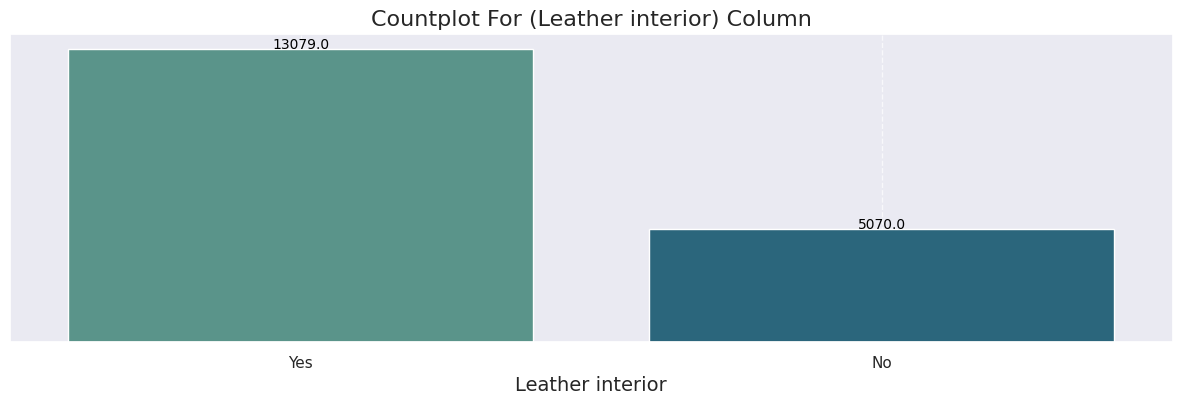

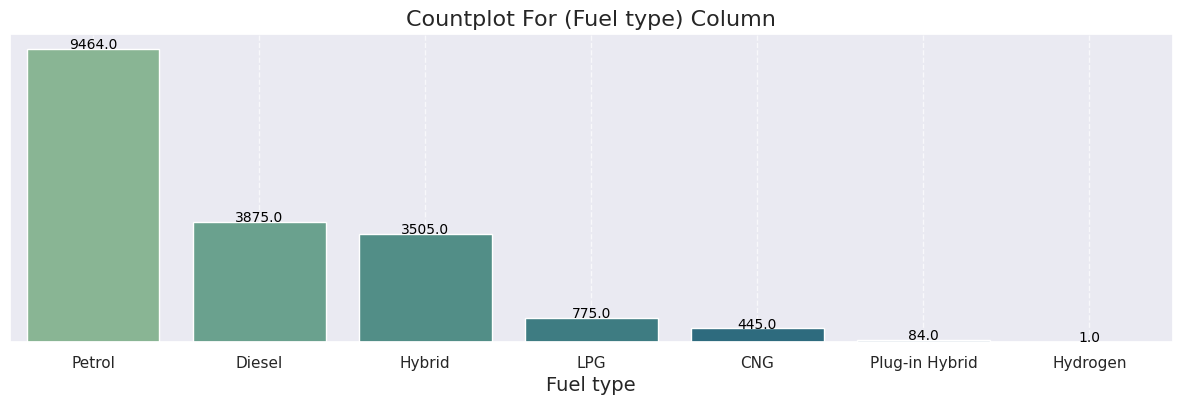

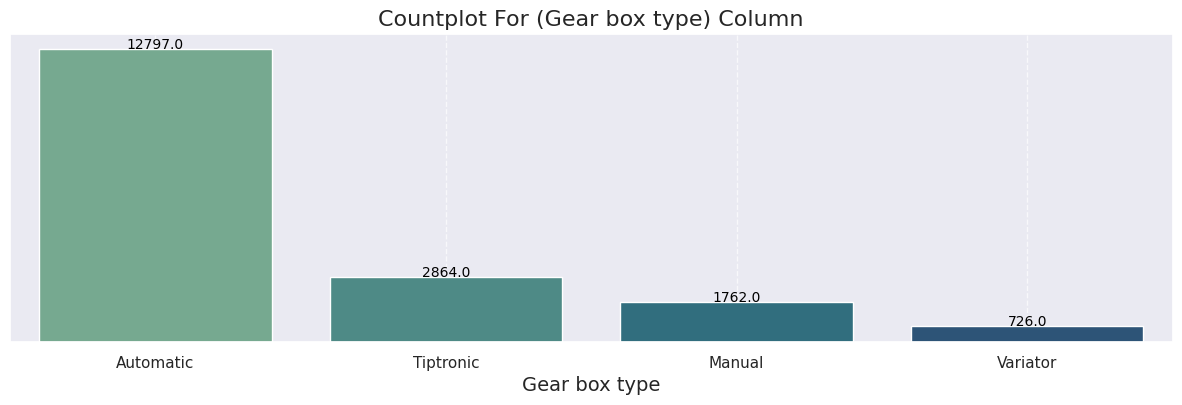

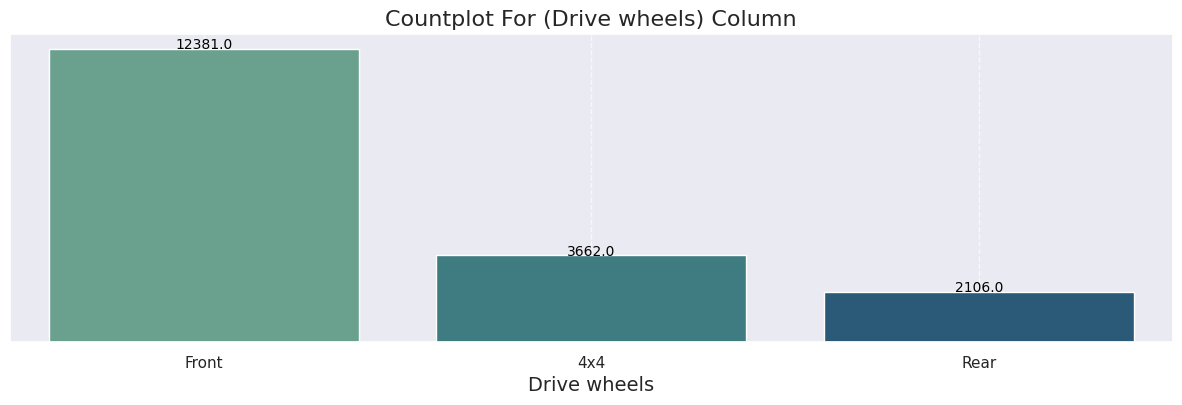

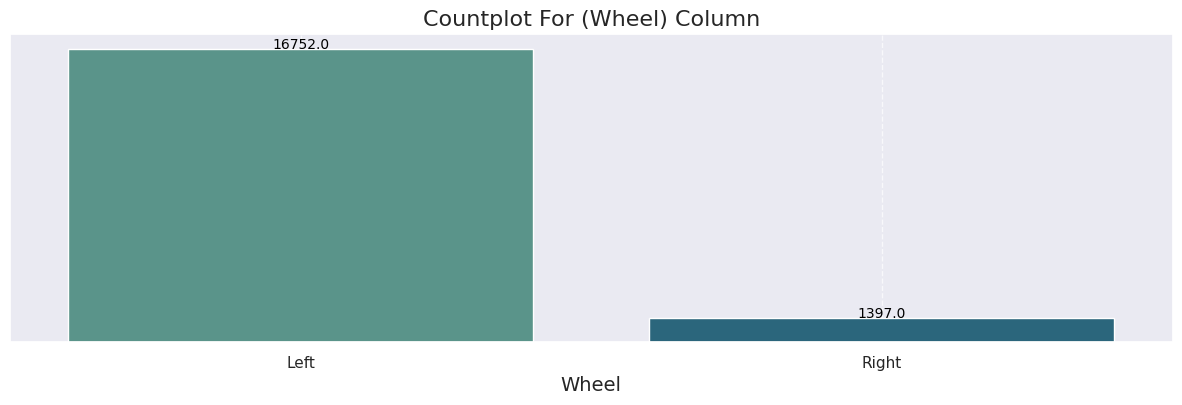

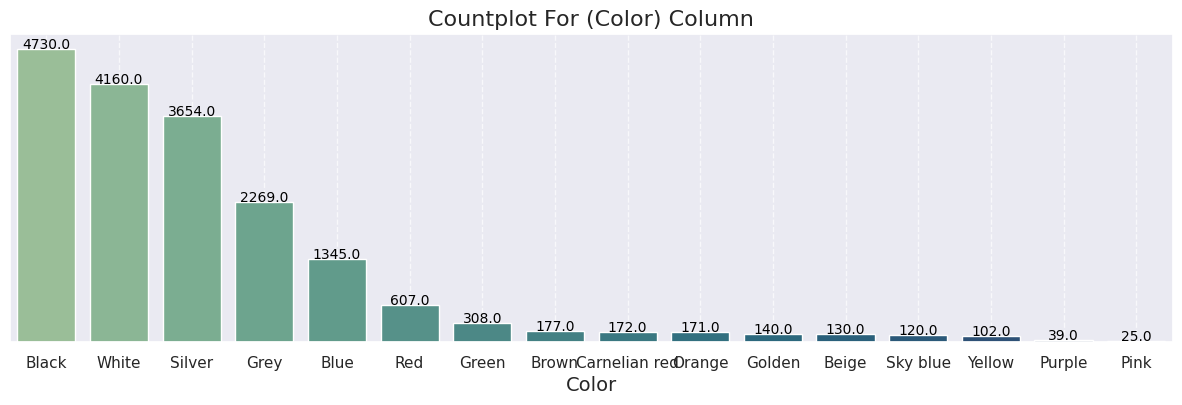

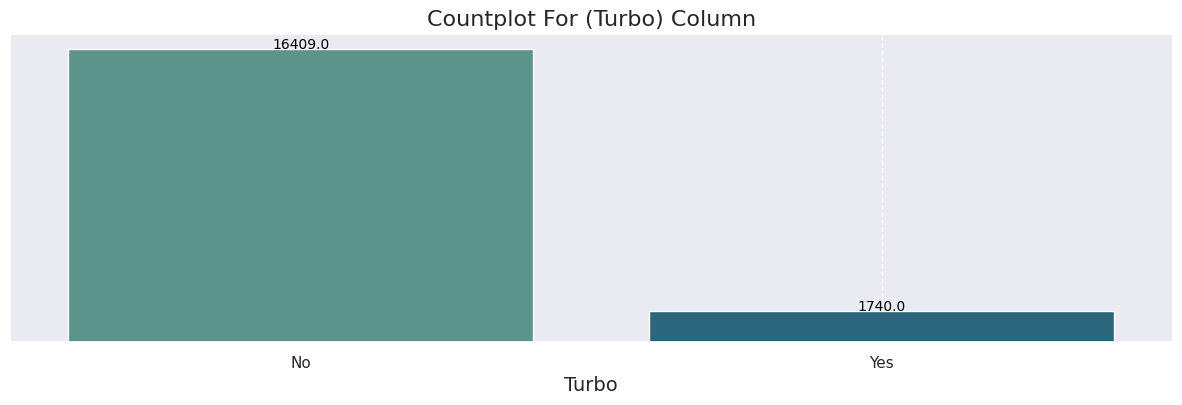

In [44]:
# plot countplots for each categorical column
for col in categ_cols:
    if col in ['Manufacturer', 'Model']:
        continue
    else:
        create_countplot(df, col)

## Investigate relationships

In [45]:
# find the most related columns with 'Price'?
df[numeric_cols].corr()

,Price,Levy,Prod. year,Engine volume,Mileage(Km),Cylinders,Airbags
Price,1.000000,0.028081,0.300377,0.106176,-0.206786,0.024719,-0.075874
Levy,0.028081,1.000000,-0.056749,0.517094,0.075022,0.438028,0.107078
Prod. year,0.300377,-0.056749,1.000000,-0.034380,-0.203423,-0.118714,0.238635
Engine volume,0.106176,0.517094,-0.034380,1.000000,0.164056,0.736565,0.188003
Mileage(Km),-0.206786,0.075022,-0.203423,0.164056,1.000000,0.140418,-0.008919
Cylinders,0.024719,0.438028,-0.118714,0.736565,0.140418,1.000000,0.175188
Airbags,-0.075874,0.107078,0.238635,0.188003,-0.008919,0.175188,1.000000


Text(0.5, 1.0, 'Correlation Between Numeric Columns')

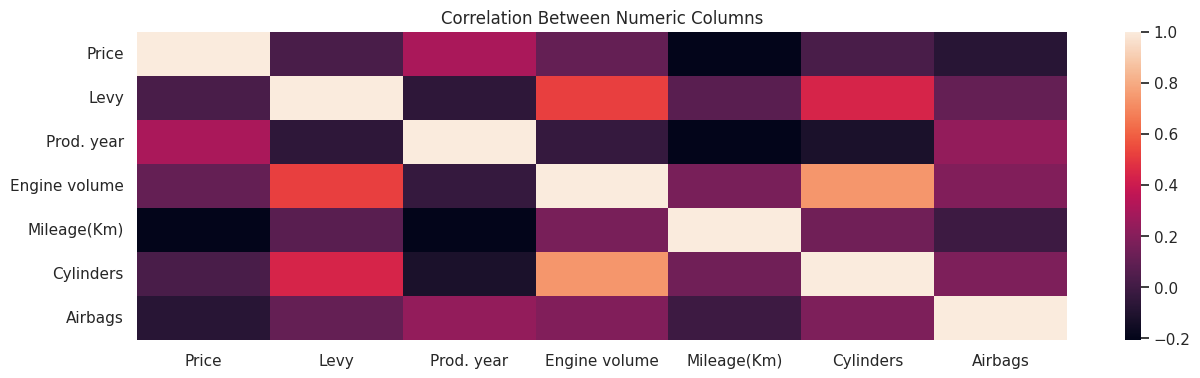

In [46]:
# plot the correlation matrix with heatmap
plt.figure(figsize=(15, 4))
ax = sns.heatmap(df[numeric_cols].corr())
plt.title('Correlation Between Numeric Columns')

The Heatmap and the correlation matrix indicate the following:

We are particularly interested in our target variable (Price). 
Therefore, we will examine how other columns affect it.

- Price has a **positive correlation** with *'Prod. year'* and *'Engine volume'*.
- Price has a **negative correlation** with *'Mileage (Km)'*.

### Plot each correlation with price

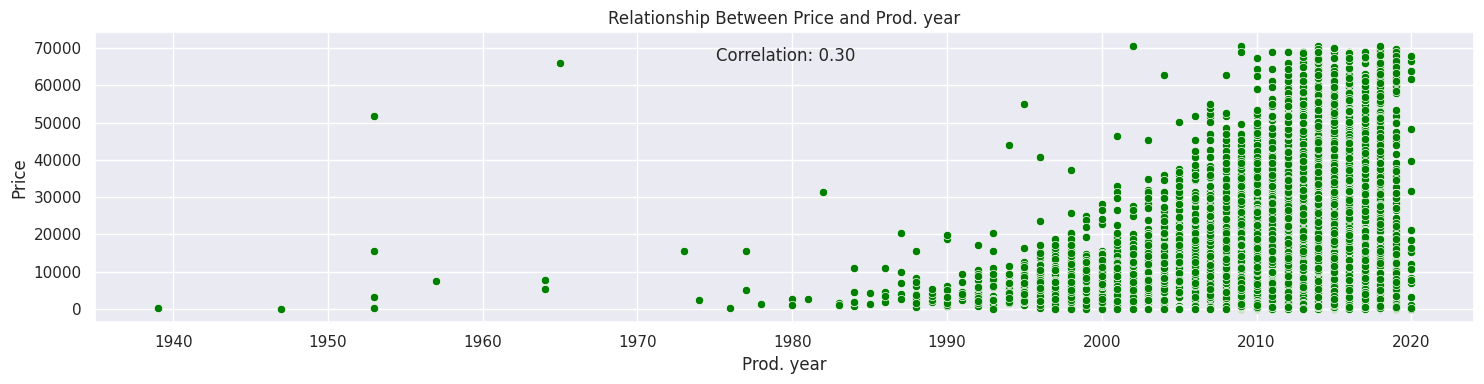

In [47]:
# plot the correlation matrix with heatmap
plt.figure(figsize=(15, 4))
sns.scatterplot(data=df, x="Prod. year", y="Price", color='green')

# calculate and display the correlation coefficient
corr_coeff = df['Prod. year'].corr(df['Price'])
plt.text(0.45, 0.9, f'Correlation: {corr_coeff:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.title('Relationship Between Price and Prod. year')
plt.tight_layout()
plt.show()

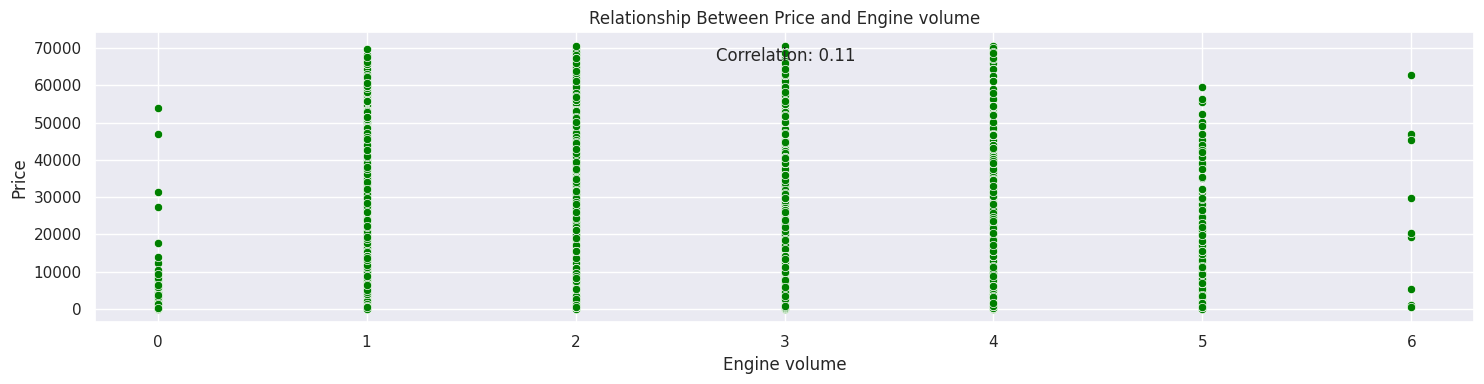

In [48]:
# plot the correlation matrix with heatmap
plt.figure(figsize=(15, 4))
sns.scatterplot(data=df, x="Engine volume", y="Price", color='green')

# calculate and display the correlation coefficient
corr_coeff = df['Engine volume'].corr(df['Price'])
plt.text(0.45, 0.9, f'Correlation: {corr_coeff:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.title('Relationship Between Price and Engine volume')
plt.tight_layout()
plt.show()

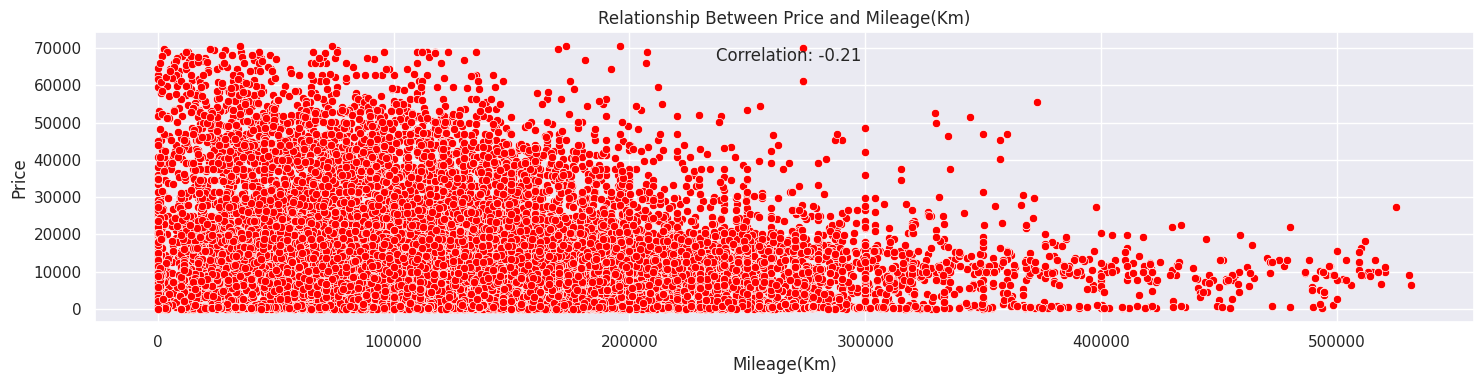

In [49]:
# plot the correlation matrix with heatmap
plt.figure(figsize=(15, 4))
sns.scatterplot(data=df, x="Mileage(Km)", y="Price", color='red')

# calculate and display the correlation coefficient
corr_coeff = df['Mileage(Km)'].corr(df['Price'])
plt.text(0.45, 0.9, f'Correlation: {corr_coeff:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.title('Relationship Between Price and Mileage(Km)')
plt.tight_layout()
plt.show()

# Modeling Part

![ML](https://www.krasamo.com/wp-content/uploads/0730Building-ML-Models.jpg)

In [50]:
# split the target variable y (Price)
X = df.drop('Price', axis=1)
y = df['Price']

### Scale Numerical Features

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns = ['Levy', 'Prod. year', 'Engine volume', 'Mileage(Km)', 'Cylinders', 'Airbags']
X[columns] = StandardScaler().fit_transform(X[columns])

X.head(3)

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage(Km),Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
0,1.925139,LEXUS,RX 450,-0.158130,Jeep,Yes,Hybrid,1.298282,0.536033,1.302606,Automatic,4x4,Left,Silver,1.258993,No
1,0.568221,CHEVROLET,Equinox,0.021172,Jeep,No,Petrol,1.298282,0.601535,1.302606,Tiptronic,4x4,Left,Black,0.330323,No
2,-0.275845,HONDA,FIT,-0.875337,Hatchback,No,Petrol,-1.043102,0.688943,-0.469184,Variator,Front,Right,Black,-1.062682,No


### Encode Categorical Variables

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in categ_cols:
    X[col] = encoder.fit_transform(X[col])

### Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape), (y_train.shape)

((14519, 16), (14519,))

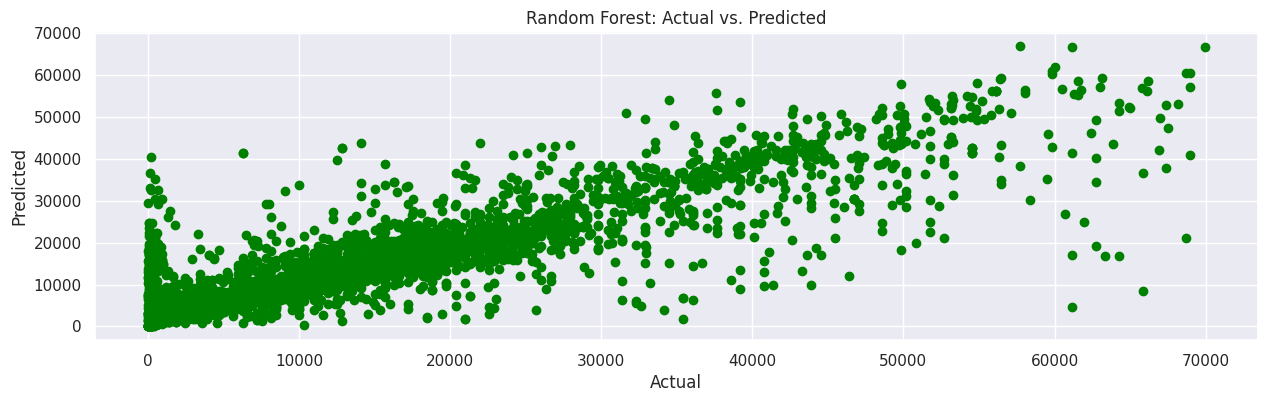

R-squared (Random Forest): 0.7612900915965269


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
r_squared_rf = r2_score(y_test, y_pred_rf)

# Plot predicted vs. actual values
plt.figure(figsize=(15, 4))
plt.scatter(y_test, y_pred_rf, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs. Predicted')
plt.show()

print(f'R-squared (Random Forest): {r_squared_rf}')

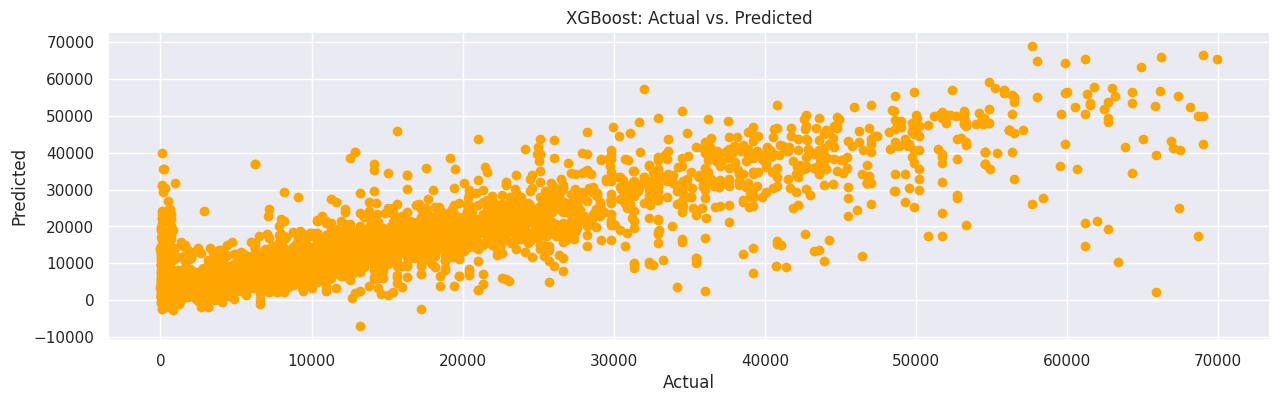

R-squared (XGBoost): 0.7572161482621189


In [55]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
r_squared_xgb = r2_score(y_test, y_pred_xgb)

plt.figure(figsize=(15, 4))
plt.scatter(y_test, y_pred_xgb, color='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs. Predicted')
plt.show()

print(f'R-squared (XGBoost): {r_squared_xgb}')

## Results and Conclusion

The performance of the models was evaluated using the R-squared metric, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

- Random Forest Model:
  - R-squared: 0.7613
  - The Random Forest model achieved a R-squared value of approximately 0.7613, indicating that it explains about 76.13% of the variance in car prices.


- XGBoost Model:
  - R-squared: 0.7572
  - The XGBoost model performed slightly below the Random Forest model, with an R-squared value of approximately 0.7572. This means that it explains about 75.72% of the variance in car prices.

Based on these results, both models demonstrated strong predictive capabilities. The Random Forest model showed a slightly higher R-squared value, suggesting it may be slightly better at capturing the underlying relationships in the data. However, the difference is marginal, and the choice between the two models may also depend on other considerations such as model complexity and interpretability.

In conclusion, both Random Forest and XGBoost models can be considered as viable options for predicting car prices. Further fine-tuning of hyperparameters and feature engineering could potentially lead to even better performance.

- [My Portfolio](https://www.datascienceportfol.io/nashaat29)
- [My LinkedIn](https://www.linkedin.com/in/mohammed-nashaat-4b47b11b2/)
- [My GitHub](https://github.com/nashaat29)